# Chapter 3

In the chapter 3 of "Web Scraping with Python" you were able to learn more about the following subjects:
* Tracking internal links of website
  * According to pattern
  * All internal links
* Website mapping
* Collecting data
* Tracking through internet

The following cells aim to practice the contents listed above. For any sugestions, contact *gabriel.vasconcelos@usp.br*

Use the website https://scraping-cap3.netlify.app/ to answer this notebook.

In [2]:
# Import BeautifulSoup and other libraries you find useful

from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urlparse
from urllib.error import HTTPError, URLError
import re
import networkx as nx
import matplotlib.pyplot as plt
import random

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
# Get the website https://scraping-cap3.netlify.app/ and pass it to a BeautifulSoup object 
# with proper error handling

def getBSObject(site):
    try:
        html = urlopen(site)
    except HTTPError as e:
        return None
    except URLError as e:
        return None
    bs = BeautifulSoup(html, 'html.parser')
    return bs
    
bs = getBSObject('https://scraping-cap3.netlify.app/index.html')

### a.
Get all internal links from the domain.

In [4]:
# Code below
# Tip: use BFS algorithm to do a full mapping of the domain

def getInternalLinksOfPage(bsObject, url):
    domain = urlparse(url).netloc
    domain = domain.replace(".", "\.")
    links = bsObject.find_all('a', {'href': re.compile(f'(^\.*\/.+$)|(https:\/\/{domain}\/.*)')})
    links = set([link.attrs['href'] for link in links])
    return links


links = getInternalLinksOfPage(bs, "https://scraping-cap3.netlify.app/baixistas.html")
links

{'./baixistas.html',
 './bandas.html',
 './bateristas.html',
 './guitarristas.html',
 './index.html',
 './tecladistas.html',
 './vocalistas.html'}

In [5]:
def makeInternalLinkAnURL(link):
    domain = urlparse(link).netloc
    url = f"https://{domain}/"
    if link.startswith('./'):
        url += link[2:]
    elif link.startswith('/'):
        url += link[1:]
    elif link.startswith('../'):
        url += link[3:]
    else:
        return link
    
    return url
    

def bfs():
    links = set()
    adjacencyList = {}
    addedToQueue = {'https://scraping-cap3.netlify.app/index.html'}
    queue = ['https://scraping-cap3.netlify.app/index.html']
    while len(queue) > 0:
        curPage = makeInternalLinkAnURL(queue.pop(0))
        links.add(curPage)
        bs = getBSObject(curPage)
        nextPages = getInternalLinksOfPage(bs, curPage)
        adjacencyList[curPage] = [makeInternalLinkAnURL(page) for page in nextPages]
        for page in nextPages:
            formatedPage = makeInternalLinkAnURL(page)
            if formatedPage not in addedToQueue:
                queue.append(formatedPage)
                addedToQueue.add(formatedPage)
                
    return links, adjacencyList

In [68]:
linksOfDomain, adjacencyList = bfs()
linksOfDomain

{'https://scraping-cap3.netlify.app/baixistas.html',
 'https://scraping-cap3.netlify.app/baixistas/Dee_Dee_Ramone.html',
 'https://scraping-cap3.netlify.app/baixistas/Geezer_Butler.html',
 'https://scraping-cap3.netlify.app/baixistas/John_Paul_Jones.html',
 'https://scraping-cap3.netlify.app/baixistas/Krist_Novoselic.html',
 'https://scraping-cap3.netlify.app/baixistas/Paul_McCartney.html',
 'https://scraping-cap3.netlify.app/baixistas/Roger_Glover.html',
 'https://scraping-cap3.netlify.app/baixistas/Simon_Gallup.html',
 'https://scraping-cap3.netlify.app/bandas.html',
 'https://scraping-cap3.netlify.app/bandas/Black_Sabbath.html',
 'https://scraping-cap3.netlify.app/bandas/Deep_Purple.html',
 'https://scraping-cap3.netlify.app/bandas/Led_Zeppelin.html',
 'https://scraping-cap3.netlify.app/bandas/Nirvana.html',
 'https://scraping-cap3.netlify.app/bandas/Ramones.html',
 'https://scraping-cap3.netlify.app/bandas/The_Beatles.html',
 'https://scraping-cap3.netlify.app/bandas/The_Cure.html'

In [38]:
adjacencyList

{'https://scraping-cap3.netlify.app/index.html': ['https://scraping-cap3.netlify.app/bateristas.html',
  'https://scraping-cap3.netlify.app/bandas.html',
  'https://scraping-cap3.netlify.app/guitarristas.html',
  'https://scraping-cap3.netlify.app/tecladistas.html',
  'https://scraping-cap3.netlify.app/baixistas.html',
  'https://scraping-cap3.netlify.app/index.html',
  'https://scraping-cap3.netlify.app/vocalistas.html'],
 'https://scraping-cap3.netlify.app/bateristas.html': ['https://scraping-cap3.netlify.app/bateristas.html',
  'https://scraping-cap3.netlify.app/bateristas/Bill_Ward.html',
  'https://scraping-cap3.netlify.app/bateristas/Ian_Paice.html',
  'https://scraping-cap3.netlify.app/bandas.html',
  'https://scraping-cap3.netlify.app/bateristas/Jason_Cooper.html',
  'https://scraping-cap3.netlify.app/guitarristas.html',
  'https://scraping-cap3.netlify.app/tecladistas.html',
  'https://scraping-cap3.netlify.app/baixistas.html',
  'https://scraping-cap3.netlify.app/bateristas/J

### b.
Get all external links from the domain.

In [48]:
# Code below

def bfsAllLinks(url):
    links = set()
    addedToQueue = {url}
    queue = [url]
    externalLinks = set()
    while len(queue) > 0:
        curPage = makeInternalLinkAnURL(queue.pop(0))
        links.add(curPage)
        bs = getBSObject(curPage)
        allLinks = bs.find_all('a')
        allLinks = set([link.attrs['href'] for link in allLinks])
        nextPages = getInternalLinksOfPage(bs)
        externalLinks = externalLinks.union(allLinks.difference(set(nextPages)))
        for page in nextPages:
            formatedPage = makeInternalLinkAnURL(page)
            if formatedPage not in addedToQueue:
                queue.append(formatedPage)
                addedToQueue.add(formatedPage)
    
    return externalLinks


In [49]:
externalLinks = bfsAllLinks("https://scraping-cap3.netlify.app/index.html")
externalLinks

KeyboardInterrupt: 

### c.
Get the title of each page in the website, its url and the first paragraph.

In [30]:
# Code below
# [{'title': 'titulo', 'url': 'url', 'firstParagraph': '...'}]
data = []

for page in linksOfDomain:
    pageData = {}
    bs = getBSObject(page)
    pageData['title'] = bs.find('title').get_text()
    pageData['url'] = page
    try:
        pageData['p1'] = bs.find('p').get_text()
    except:
        pageData['p1'] = None
    
    data.append(pageData)

In [31]:
data

[{'title': 'Nirvana',
  'url': 'https://scraping-cap3.netlify.app/bandas/Nirvana.html',
  'p1': 'Nirvana (em sânscrito: निर्वाण; em prácrito: णिव्वाण, em pali: निब्बान, transliterado "Nibbāna", significa: "soprar", "ser assoprado" ou "incodicionado"), no Budismo, é o estado de libertação do sofrimento (ou dukkha),[1][2][3] uma superação do apego aos sentidos, do material, da existência e da ignorância; a pureza e a transgressão do físico, a qual busca a paz interior e a essência da vida. Segundo os monges shramana é o estado atingido pelos Arahant (seres de elevada estatura espiritual).'},
 {'title': 'John Bonham',
  'url': 'https://scraping-cap3.netlify.app/bateristas/John_Bonham.html',
  'p1': 'John Henry Bonham (Redditch, 31 de maio de 1948 – Clewer, 25 de setembro de 1980) foi um músico e compositor inglês, mais conhecido por ter sido o baterista da banda Led Zeppelin. Bonham era admirado por sua velocidade, potência, sons característicos, e sensibilidade para o groove.[1]'},
 {'ti

### d.
Create an adjacency list of the domain (directed graph).

In [6]:
# Code below

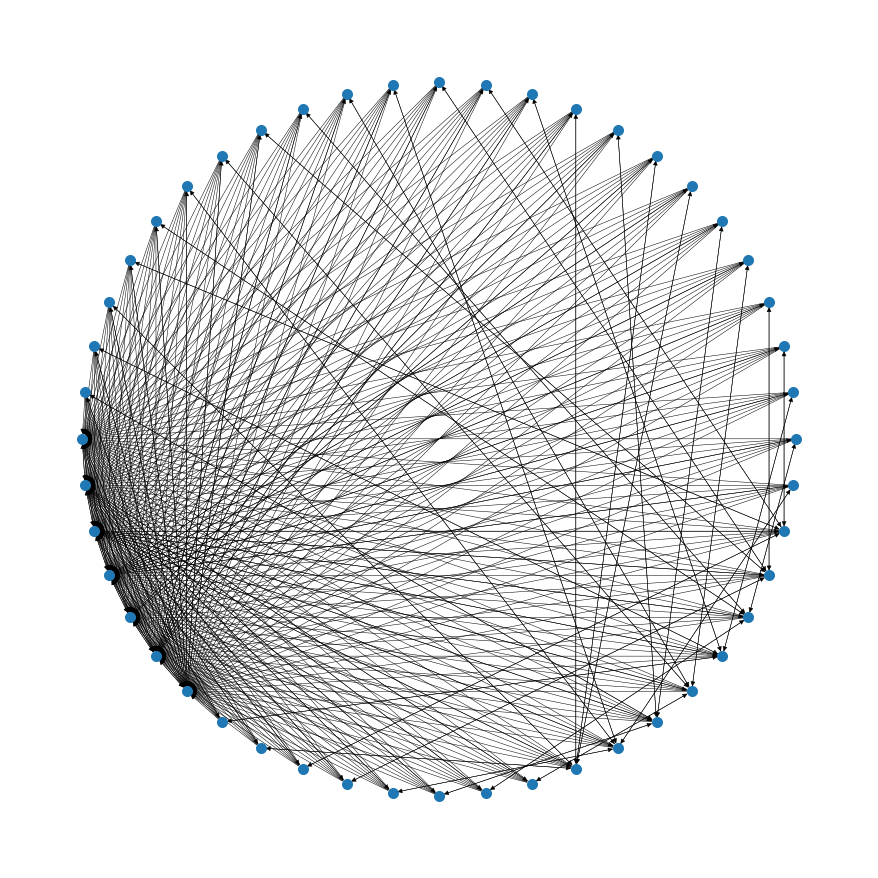

In [39]:
# Use networkx to generate a visualization of the graph
'''
Create an adjacency list in the following format:

adjacencyList = {
    'node A': ['nodeB', 'nodeC'],
    'node B': ['node C']
}
'''

G = nx.DiGraph()

for fromSite in adjacencyList:
    for toSite in adjacencyList[fromSite]:
        G.add_edge(fromSite, toSite)
        
nodes = list(G.nodes)
for node in nodes:
    if len(node) == 1:
        print(node)
        G.remove_node(node)
        
plt.figure(3,figsize=(12,12)) 
nx.draw(G, pos=nx.shell_layout(G), node_size=100, width=0.5)
plt.show()

### e.
From the website external links, choose one randomly and create a internet crawler.

In [9]:
# Code below

def getNextUrl(url):
    queue = [url]
    addedToQueue = {url}
    externalLinks = set()
    
    while len(queue) > 0:
        page = makeInternalLinkAnURL(queue.pop(0))
        
        bs = getBSObject(page)
    
        if not bs:
            return None
    
        allLinks = bs.find_all('a', href=re.compile("^http"))
        allLinks = set([link.attrs['href'] for link in allLinks])
        nextPages = getInternalLinksOfPage(bs, page)
        externalLinks = externalLinks.union(allLinks.difference(set(nextPages)))
    
        if externalLinks:
            nextPage = random.choice(list(externalLinks))
            return nextPage
        
        for link in nextPages:
            formatedLink = makeInternalLinkAnURL(link)
            if formatedLink not in addedToQueue:
                queue.append(formatedLink)
                addedToQueue.add(formatedLink)
        
    return None

def percorrer(url):
    flag = True
    urls = []
    curr = url
    # if not url: return
    # nextPage = getNextUrl(url)
    # percorrer(nextPage)
    while flag:
        urls.append(curr)
        curr = getNextUrl(curr)
        
        if not curr: 
            flag = False
            
    return urls

In [10]:
exts = []

for _ in range(1000):
    pages = percorrer("https://scraping-cap3.netlify.app/index.html")
    if len(pages) > len(exts):
        exts = pages
    
print(exts)
    

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
